# Assignment 2
## Part 2: Scale-Space Blob Construction   
Mohammad Rashiqul Alam  
malam25@illinois.edu  

In [4]:
# Modules
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from   PIL import Image

## Image Pre-Processing

### Import All ALigned Images
Import low-resolution images from ~/Gen/a2/lowres_rgb/preprocessed  
Import high-resolution images from ~/Gen/a2/hires_rgb/preprocessed

**Notebook assumes the output has been generated froma alam_rashiqul_a2_p1.pynb

In [20]:
# Import aligned images to notebook
def import_aligned_images(path, ext='jpg'):
    """
    Function to import aligned images from a specified directory, 
    only those ending with *_aligned.jpg.
    Args:
    - path: str, path to the directory containing images
    - ext: str, file extension of the images to import (default: 'jpg')
    Returns:
    - images: list of numpy arrays (each image)
    """
    images = []
    for file in os.listdir(path):
        if file.endswith(f"_aligned.{ext}"):
            img = Image.open(os.path.join(path, file))
            images.append(np.array(img))
    return images

# Plot aligned images
def plot_aligned_images(images, filenames=None, use_gray=False):
    """
    Function to plot all aligned images from the dataset.
    Args:
        images: list of numpy arrays (each image)
        filenames: list of filenames corresponding to images (optional)
        use_gray: bool, if True use grayscale colormap
    Returns:
        None
    """
    n = len(images)
    plt.figure(figsize=(2.5 * n, 4))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        if use_gray:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(images[i])
        plt.axis("off")
        if filenames:
            name = filenames[i].replace('_aligned.jpg', '').replace('_aligned.jpeg', '').replace('_aligned.png', '')
            ax.set_title(name, fontsize=10)
    plt.show()

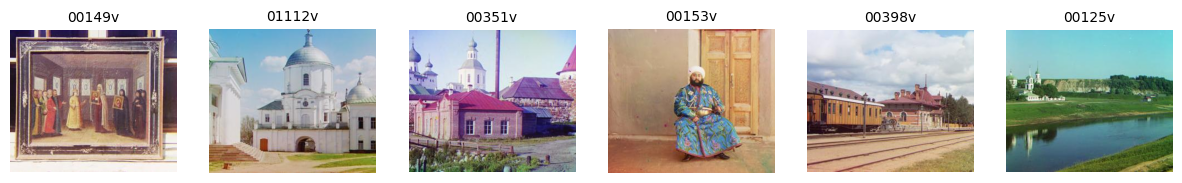

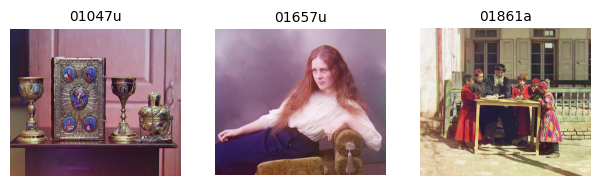

In [22]:
# Get the directory one level above the notebook location
notebook_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
parent_dir = os.path.dirname(notebook_dir)
lowres_preproc_dir = os.path.join(parent_dir, "Gen", "a2", "lowres_rgb", "preprocessed")
highres_preproc_dir = os.path.join(parent_dir, "Gen", "a2", "hires_rgb", "preprocessed")

# Import low-res images
low_res_images = import_aligned_images(lowres_preproc_dir, ext='jpg')
# Get filenames for low-res images
low_res_filenames = [f for f in os.listdir(lowres_preproc_dir) if f.endswith("_aligned.jpg")]
# Import high-res images
high_res_images = import_aligned_images(highres_preproc_dir, ext='jpg')
# Get filenames for high-res images
high_res_filenames = [f for f in os.listdir(highres_preproc_dir) if f.endswith("_aligned.jpg")]

# Plot images
plot_aligned_images(low_res_images, low_res_filenames, use_gray=False)
plot_aligned_images(high_res_images, high_res_filenames, use_gray=False)

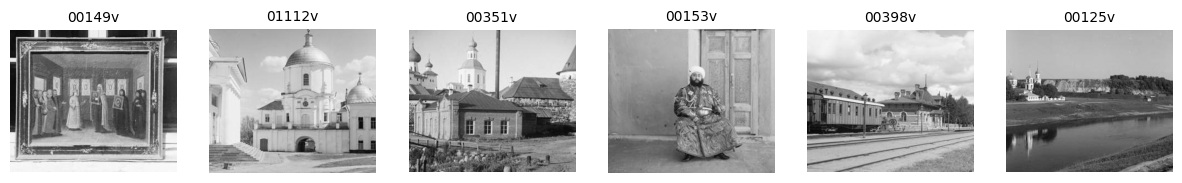

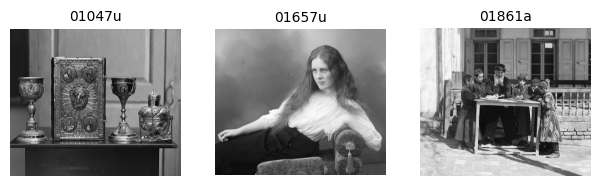

In [21]:
# Convert images to grayscale and rescale intensities to [0, 1]
low_res_gray = [np.array(Image.fromarray(img).convert('L')) / 255.0 for img in low_res_images]
high_res_gray = [np.array(Image.fromarray(img).convert('L')) / 255.0 for img in high_res_images]

# Plot gray-scale images
plot_aligned_images(low_res_gray, low_res_filenames, use_gray=True)
plot_aligned_images(high_res_gray, high_res_filenames, use_gray=True)

### Choice of Images for Part 2: Scale-Space Blob Construction

Selected four aligned images for this part of the assignment:
1. **00125v_aligned.jpg (Church by river)**  
   - Contains both natural features (trees, cliffs, river) and man-made structures (church buildings).  
   - Provides a mix of sharp corners and smoother regions, useful for testing corner detection and blob scale behavior.
2. **00351v_aligned.jpg (Brick house with domes)**  
   - Rich in architectural detail with windows, rooftops, and domes.  
   - Good distribution of corners and circular blob-like features at different scales.
3. **00398v_aligned.jpg (Train station with train cars)**  
   - Strong geometric patterns from train cars, station buildings, and tracks.  
   - Tests whether the method correctly preserves scale/orientation across repeating man-made structures.
4. **01047u_aligned.jpg (Chalices and book)**  
   - Objects with fine texture and small-scale blob-like details (ornamental designs, circular cups).  
   - Complements the larger-scale features in the other images with smaller, high-detail regions.

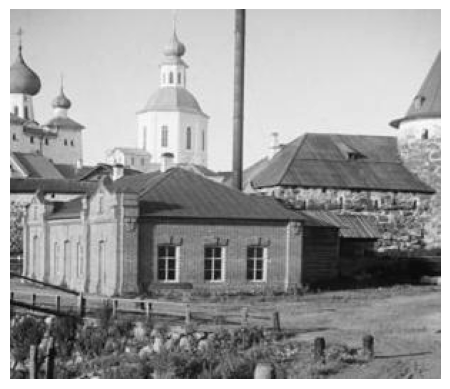

00351v (Low-res)


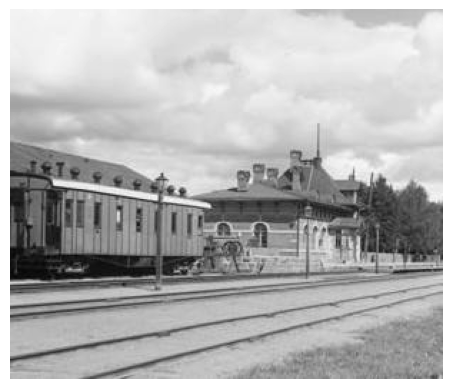

00398v (Low-res)


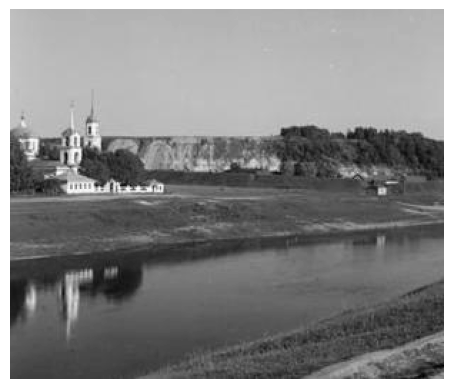

00125v (Low-res)


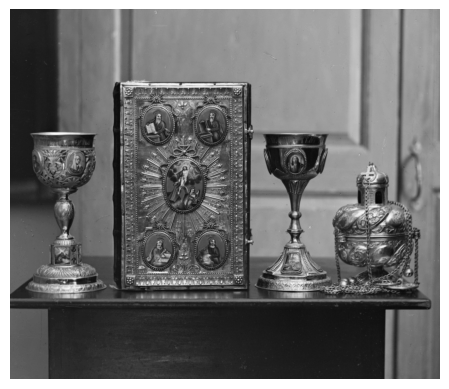

01047u (High-res)


In [31]:
selected_names = [
    "00125v_aligned.jpg",
    "00351v_aligned.jpg",
    "00398v_aligned.jpg",
    "01047u_aligned.jpg"
]

# Build the dictionary
selected_images_dict = {}

# Add low-res images
for i, fname in enumerate(low_res_filenames):
    if fname in selected_names:
        key = fname.replace('_aligned.jpg', '')
        selected_images_dict[key] = {"low_res": low_res_gray[i]}

# Add high-res images
for i, fname in enumerate(high_res_filenames):
    if fname in selected_names:
        key = fname.replace('_aligned.jpg', '')
        if key in selected_images_dict:
            selected_images_dict[key]["high_res"] = high_res_gray[i]
        else:
            selected_images_dict[key] = {"high_res": high_res_gray[i]}

# Plot the images
for name, imgs in selected_images_dict.items():
    if "low_res" in imgs:
        plt.imshow(imgs["low_res"], cmap='gray')
        plt.axis("off")
        plt.show()
        print(f"{name} (Low-res)")
    if "high_res" in imgs:
        plt.imshow(imgs["high_res"], cmap='gray')
        plt.axis("off")
        plt.show()
        print(f"{name} (High-res)")